In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import IPython.display as display

%matplotlib inline
import seaborn
# import mpld3
from datetime import datetime

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.max_colwidth', -1)
# mpld3.enable_notebook()

## Conference Statistics

In [15]:
data = pd.read_csv("data/Conference Statistics.csv")
data

,Year,Location,Country,Number of Participants,Submitted Papers,Accepted Papers,Acceptance Rate
0,2000,"Plymouth, Massachusetts",USA,88,NaN,35,NaN
1,2001,"Bloomington, Indiana",USA,100,NaN,18,NaN
2,2002,Paris,France,175,NaN,57,NaN
3,2003,"Baltimore, Maryland",USA,136,NaN,50,NaN
4,2004,Barcelona,Spain,189,NaN,106,NaN
5,2005,London,UK,180,NaN,115,NaN
6,2006,"Victoria, British Columbia",Canada,180,NaN,96,NaN
7,2007,Vienna,Austria,250,NaN,129,NaN
8,2008,"Philadelphia, Pennsylvania",USA,257,173,107,62%
9,2009,Kobe,Japan,308,202,148,73%


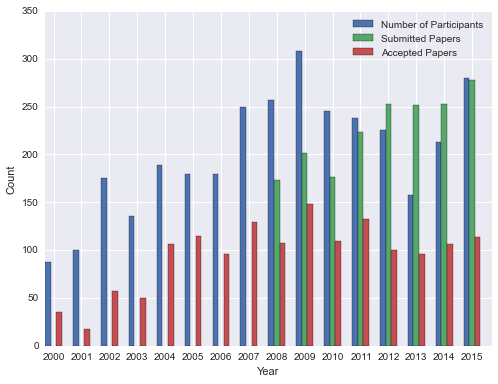

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fields = ['Number of Participants', 'Submitted Papers', 'Accepted Papers']
for n, k in enumerate(fields):
    ax.bar(data.Year + 0.2*n, data[k], width=0.2, 
           fc=seaborn.color_palette()[n], label=k)

ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("")
plt.xticks(data.Year + 0.3, [str(v) for v in np.array(data.Year)])
plt.legend()
plt.savefig('../ismir_web/img/conference_stats.png')

## Membership

In [17]:
data = pd.read_csv("data/Community Membership.csv")
data

,Date,Members
0,9/8/2002,491
1,6/26/2003,608
2,4/11/2004,657
3,3/5/2005,691
4,5/4/2006,812
5,4/3/2007,931
6,3/27/2008,1043
7,2/27/2009,1151
8,3/7/2010,1262
9,10/2/2011,1505


In [18]:
date_format = "%m/%d/%Y"
d = [datetime.strptime(d, date_format) for d in np.array(data.Date)]
d = [dd.days for dd in np.diff(d)]
d = np.cumsum(d)
d = np.r_[0., d]
d = d  / np.max(d) * (len(d) - 1)

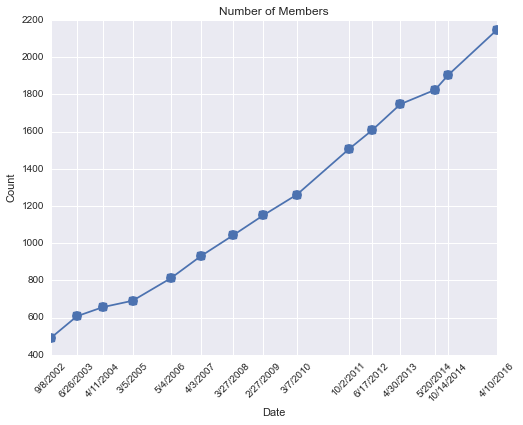

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(d, data.Members, 'o-', c=seaborn.color_palette()[0], ms=10)
plt.xticks(d, data.Date, rotation=45)
plt.title("Number of Members")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.savefig('../ismir_web/img/membership_stats.png')

In [20]:
formatter = lambda x: '<strong>'+x+'</strong>' if 'Music Information Retrieval' in x else x
data = pd.read_csv("data/Google Scholar Publication Rankings - Multimedia.csv", header=1)
cols = data.keys()
rank = np.where(['Music Information Retrieval' in r for r in data.Publication])[0]
rank = int(data.Rank[rank])
if rank == 1:
    post = 'st'
elif rank == 2:
    post = 'nd'
elif rank == 3:
    post = 'rd'
else:
    post = 'th'

In [21]:
table = ''
table += '<p><b>ISMIR</b> is currently the <b>{rank}{post} '.format(rank=rank, post=post)
table += 'ranked publication in the &#8220;Multimedia&#8221; subcategory of '
table += '&#8220;Engineering and Computer Science&#8221;</b> '
table += '<a href="http://scholar.google.com/citations?view_op=top_venues&amp;hl=en&amp;vq=eng_multimedia" '
table += 'target="new">(Link.)</a></p>\n'
table += data.to_html(index=False, formatters={'Publication': formatter}, escape=False)

In [22]:
data = pd.read_csv("data/Google Scholar Publication Rankings - Music & Musicology.csv", header=1)
cols = data.keys()
rank = np.where(['Music Information Retrieval' in r for r in data.Publication])[0]
rank = int(data.Rank[rank])
if rank == 1:
    post = 'st'
elif rank == 2:
    post = 'nd'
elif rank == 3:
    post = 'rd'
else:
    post = 'th'

In [23]:
table += '<p>&nbsp;</p>\n'
table += '<p>and the <b>{rank}{post} '.format(rank=rank, post=post)
table += 'ranked in the &#8220;Music &amp; Musicology&#8221; subcategory of '
table += '&#8220;Humanities, Literature, and Arts&#8221;</b> '
table += '<a href="http://scholar.google.com/citations?view_op=top_venues&amp;hl=en&amp;vq=hum_musicmusicology&amp;venue=XBwMiZEPey4J.2014" '
table += 'target="new">(Link.)</a></p>\n'
table += data.to_html(index=False, formatters={'Publication': formatter}, escape=False)

In [24]:
print(table)

<p><b>ISMIR</b> is currently the <b>6th ranked publication in the &#8220;Multimedia&#8221; subcategory of &#8220;Engineering and Computer Science&#8221;</b> <a href="http://scholar.google.com/citations?view_op=top_venues&amp;hl=en&amp;vq=eng_multimedia" target="new">(Link.)</a></p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Publication</th>
      <th>h5-index</th>
      <th>h5-median</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>IEEE Transactions on Circuits and Systems for Video Technology</td>
      <td>51</td>
      <td>70</td>
    </tr>
    <tr>
      <td>2</td>
      <td>ACM International Conference on Multimedia</td>
      <td>45</td>
      <td>74</td>
    </tr>
    <tr>
      <td>3</td>
      <td>IEEE Transactions on Multimedia</td>
      <td>45</td>
      <td>58</td>
    </tr>
    <tr>
      <td>4</td>
      <td>IEEE International Conference on Image Processing (ICIP)</td>
      <td>

In [25]:
with open('stats_source.txt', 'r') as f:
    stats_source = f.read()

In [26]:
with open('../ismir_web/stats.html', 'w') as f:
    f.write(stats_source.format(impact=table))